In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
plt.rcParams["figure.figsize"]=(15,5)

In [81]:
df = pd.read_csv('Datos Sol.dat', sep='\s+', names=['Year','Month','Day','SSN'],skiprows=2).dropna()
df['Date'] = pd. to_datetime(df[['Year','Month','Day']])
limite=pd.to_datetime("2012-01-01")
datos_f=df[df['Date'] <= limite]
prom=datos_f['SSN'].mean()
datos_f['SSN']-=prom
datos_f

C:\Users\cataf\AppData\Local\Temp\ipykernel_20356\2552876701.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_f['SSN']-=prom


,Year,Month,Day,SSN,Date
0,1945,1,1,-60.949657,1945-01-01
1,1945,1,2,-70.949657,1945-01-02
2,1945,1,3,-69.949657,1945-01-03
3,1945,1,4,-68.949657,1945-01-04
4,1945,1,5,-59.949657,1945-01-05
...,...,...,...,...,...
24467,2011,12,28,-8.949657,2011-12-28
24468,2011,12,29,-3.949657,2011-12-29
24469,2011,12,30,-12.949657,2011-12-30
24470,2011,12,31,-15.949657,2011-12-31


1.1) Periodo del ciclo solar

In [82]:
transf=abs(np.fft.fft(datos_f["SSN"]))
frecs=np.fft.fftfreq(len(datos_f["SSN"]))

(array([1.76441972e-10, 3.87667501e+04, 2.34715073e+05, ...,
        1.03800578e+05, 2.34715073e+05, 3.87667501e+04]),
 array([1.        , 1.00004086, 1.00008173, ..., 0.99987741, 0.99991827,
        0.99995914]))

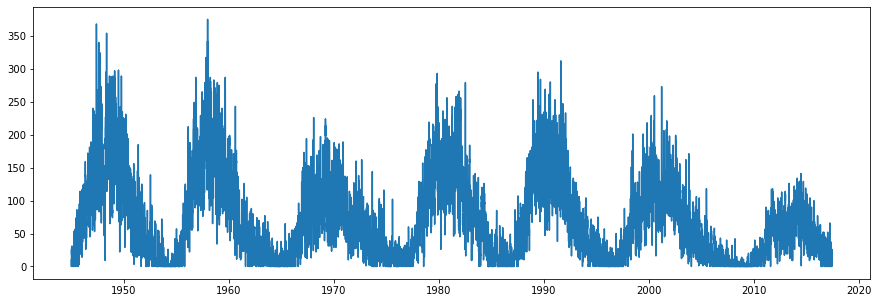

In [83]:
plt.plot(df['Date'], df["SSN"])

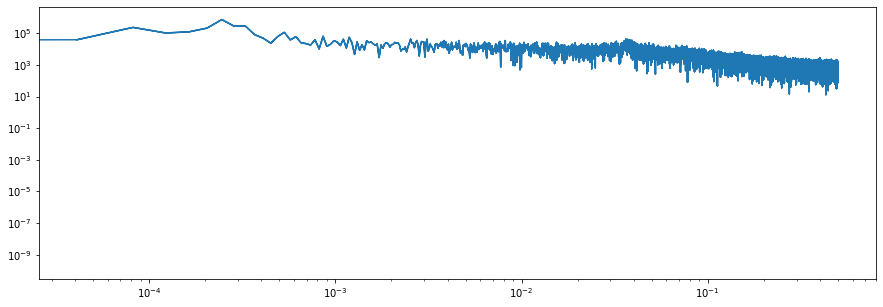

In [84]:
plt.plot(abs(frecs), abs(transf))
plt.xscale("log")
plt.yscale("log")
#promedio

In [85]:
f_ppal=abs(frecs[np.argmax(transf)])
periodo=1/f_ppal
periodo,f_ppal

(4078.6666666666665, 0.0002451781627983001)

In [86]:
periodo_años=periodo/365.25
print("El periodo del ciclo de actividad solar en años es de ",round(periodo_años,0)," años")

El periodo del ciclo de actividad solar en años es de  11.0  años


1.2) Reducción de ruido: filtro pasabajas

In [87]:
n=len(datos_f["SSN"])
alpha=1000
f=np.fft.fftfreq(n)

24472

In [88]:
filtro=np.exp(-((f*alpha)**2))
#filtro=np.sort(filtro)[::-1]
transf_filtrada=transf*filtro

1.2.a)

C:\Users\cataf\AppData\Local\Temp\ipykernel_20356\2002497550.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.abs(np.log10(f)),np.abs(np.log10(transf)))
C:\Users\cataf\AppData\Local\Temp\ipykernel_20356\2002497550.py:1: RuntimeWarning: invalid value encountered in log10
  plt.plot(np.abs(np.log10(f)),np.abs(np.log10(transf)))


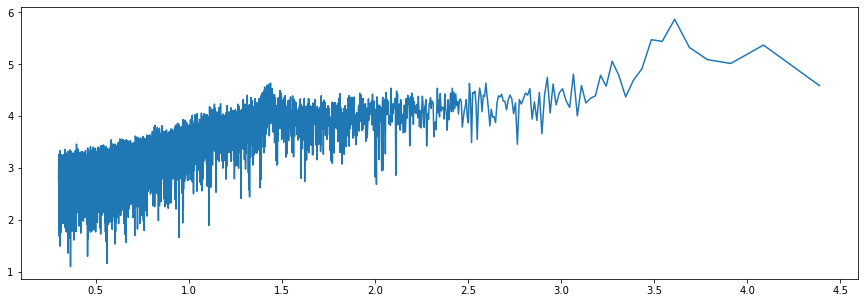

In [89]:
plt.plot(np.abs(np.log10(f)),np.abs(np.log10(transf)))
#plt.plot(np.abs(np.log10(f[100:]+1)),np.abs(np.log10(transf[100:])))
#plt.plot(np.abs(np.log10(f[1:n//2])),np.abs(np.log10(transf[1:n//2])))

C:\Users\cataf\AppData\Local\Temp\ipykernel_20356\1138183298.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.abs(np.log10(f[1:n//2])),np.abs(np.log10(transf_filtrada[1:n//2])))


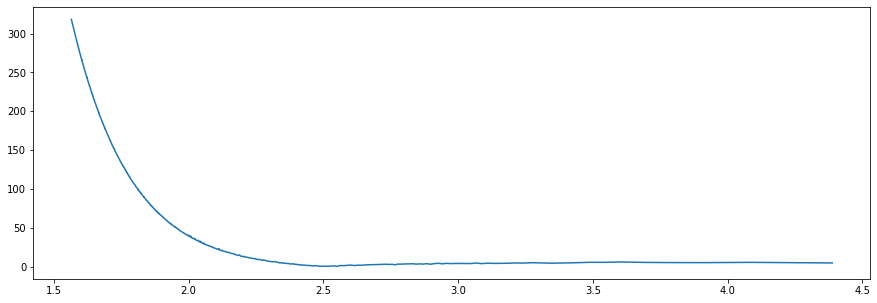

In [90]:
plt.plot(np.abs(np.log10(f[1:n//2])),np.abs(np.log10(transf_filtrada[1:n//2])))
#plt.plot(np.abs(np.log10(f),np.abs(np.log10(transf_filtrada))))
#plt.plot(abs(f),transf_filtrada)

C:\Users\cataf\AppData\Local\Temp\ipykernel_20356\925078703.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.abs(np.log10(f)),np.abs(np.log10(transf)))
C:\Users\cataf\AppData\Local\Temp\ipykernel_20356\925078703.py:1: RuntimeWarning: invalid value encountered in log10
  plt.plot(np.abs(np.log10(f)),np.abs(np.log10(transf)))
C:\Users\cataf\AppData\Local\Temp\ipykernel_20356\925078703.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.abs(np.log10(f)),np.abs(np.log10(transf_filtrada)))
C:\Users\cataf\AppData\Local\Temp\ipykernel_20356\925078703.py:2: RuntimeWarning: invalid value encountered in log10
  plt.plot(np.abs(np.log10(f)),np.abs(np.log10(transf_filtrada)))


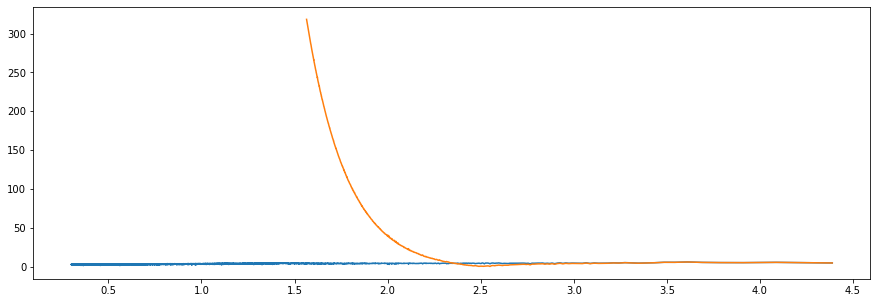

In [91]:
plt.plot(np.abs(np.log10(f)),np.abs(np.log10(transf)))
plt.plot(np.abs(np.log10(f)),np.abs(np.log10(transf_filtrada)))

1.2.b)

In [92]:
regreso_original=np.fft.ifft(transf).real
señal_filtrada=np.fft.ifft(transf_filtrada).real
regreso_original

array([2961.60200238, 1875.02155553, 1403.41481183, ..., 1083.6473963 ,
       1403.41481183, 1875.02155553])

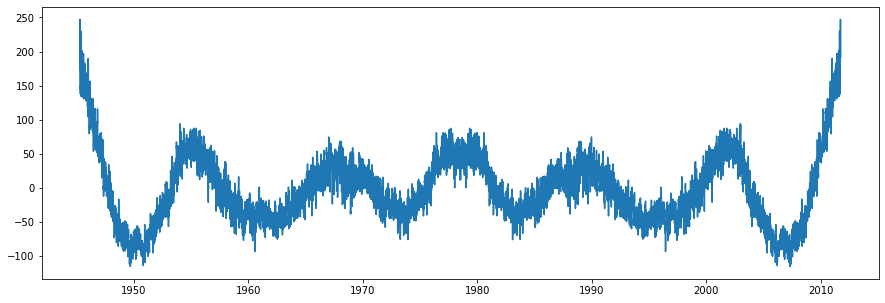

In [93]:
#plt.plot(datos_f["Date"][40:-40],regreso_original[40:-40])
plt.plot(datos_f["Date"][100:n-100].values,regreso_original[100:n-100])

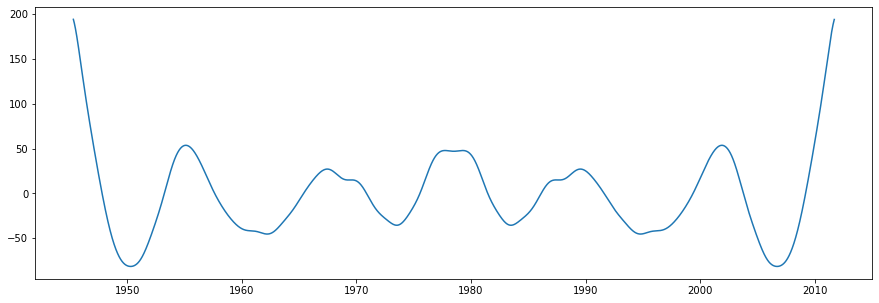

In [94]:
#plt.plot(datos_f["Date"][30:-30],señal_filtrada[30:-30])

plt.plot(datos_f["Date"][100:n-100],señal_filtrada[100:n-100])

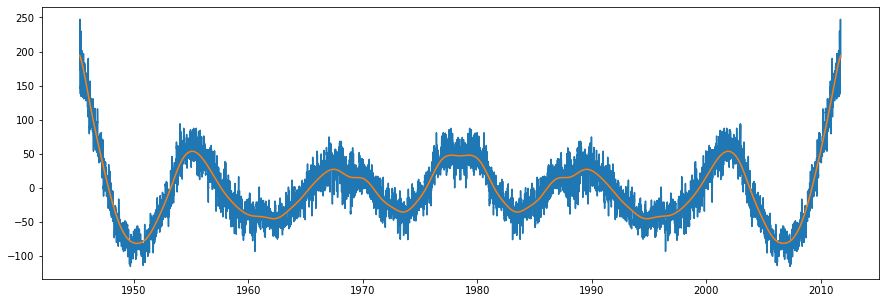

In [95]:
plt.plot(datos_f["Date"][100:n-100].values,regreso_original[100:n-100], label='Regreso de la Original')
plt.plot(datos_f["Date"][100:n-100],señal_filtrada[100:n-100], label='Señal filtrada')

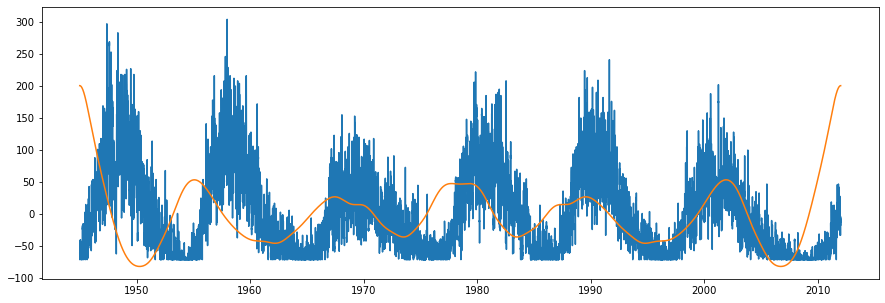

In [96]:
plt.plot(datos_f['Date'], datos_f["SSN"])
plt.plot(datos_f["Date"],señal_filtrada, label='Señal filtrada')

1.3) Extrapolación de funciones (más o menos) periódicas

In [97]:
n_armonico=10
fk=np.array(f[:n_armonico])
fk=np.append(fk,f[-n_armonico:])
Fk=np.array(transf[:n_armonico])
Fk=np.append(Fk,transf[-n_armonico:])
n#longitud dataframe
#len(fk)
print(len(fk),len(Fk))

20 20


In [98]:
inicio=date(1945, 1, 1)
fin=date(2045, 1, 1)
dias_total=(pd.to_datetime(fin) - pd.to_datetime(inicio)).days
tiempo_dias=np.arange(0, dias_total + 1)
tiempo_dias

array([    0,     1,     2, ..., 36523, 36524, 36525])

In [103]:
inicio=date(1945, 1, 1)
agosto=date(2012,8,1)
dias_agosto=(pd.to_datetime(agosto) - pd.to_datetime(inicio)).days
dias_agosto

24684

In [104]:
señal_extrap=np.zeros(len(tiempo_dias), dtype=complex)
for i in range(len(fk)):
    #señal_extrap= np.append(señal_extrap,Fk[i] * np.exp(2j * np.pi * fk[i] * tiempo_dias[i]))
    señal_extrap+=Fk[i] * np.exp(2j * np.pi * fk[i] * tiempo_dias)
señal_extrap/=n
len(señal_extrap)
#debería ser un array? de qué longitud

36526

In [105]:
manchas_agosto=señal_extrap[dias_agosto]
manchas_agosto.real

164.5942120518939

c:\Users\cataf\LAST\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


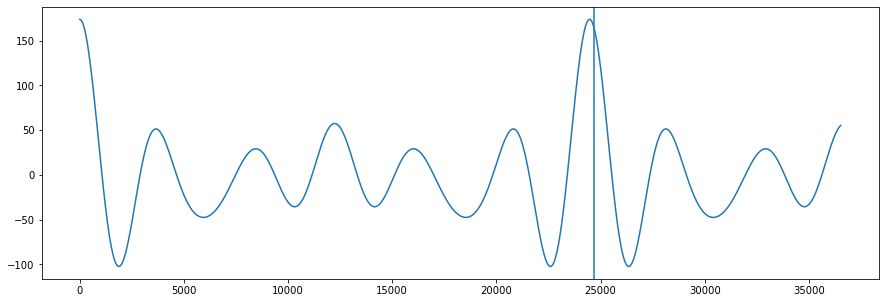

In [106]:
plt.plot(tiempo_dias, señal_extrap)
plt.axvline(x=dias_agosto)

1. ¿En qué parte del ciclo solar estamos?\
    En este mimento nos encontramos en una etapa decreciente del ciclo solar
2.  ¿Cuántas manchas deberíamos esperar a mitad de Agosto?\
    A mitad de agosto deberíamos esperar 164 manchas solares